<link rel="stylesheet" href="custom.css">

<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Mineração de Dados

## Visualização de Dados
---

# Conteúdo

- Revisão da última aula

- Visualização de Dados Não-Convencionais

- Dados temporais e sequenciais contínuos

- Dados de texto

## Dados Temporais

### Gráficos com Mais de Uma Variável Contínua (dados multivariados)

- Na biblioteca ggplot2 para que possamos visualizar várias variáveis em um gráfico ao longo do tempo, precisamos ter os dados no formato Long. Atualmente nossos dados estão no formato Wide. 

- É muito comum ter que transformar os dados de um formato para outro de acordo com a técnica que estejamos usando para visualizar ou tratar dados.

- O formato Wide é:

In [3]:
library(ggplot2)
library(data.table)
head(economics)

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945
1967-09-01,516.3,199113,11.7,4.6,2958
1967-10-01,512.9,199311,12.5,4.9,3143
1967-11-01,518.1,199498,12.5,4.7,3066
1967-12-01,525.8,199657,12.1,4.8,3018


- O formato Long do mesmo conjunto de dados é:

In [4]:
library(data.table)
economics.long <- data.table(melt(economics, id.vars = c("date"), measure.vars = c("pce", "pop", "psavert","uempmed","unemploy")))

In [5]:
head(economics.long)

date,variable,value
1967-07-01,pce,507.4
1967-08-01,pce,510.5
1967-09-01,pce,516.3
1967-10-01,pce,512.9
1967-11-01,pce,518.1
1967-12-01,pce,525.8


Neste formato para cada **date** e cada **variable** temos um *valor*.

Agora podemos visualizar mais do que uma variável (neste caso *pop*, *uempmed* e *unemploy*) da seguinte forma:

In [6]:
options(repr.plot.width=8, repr.plot.height=4)

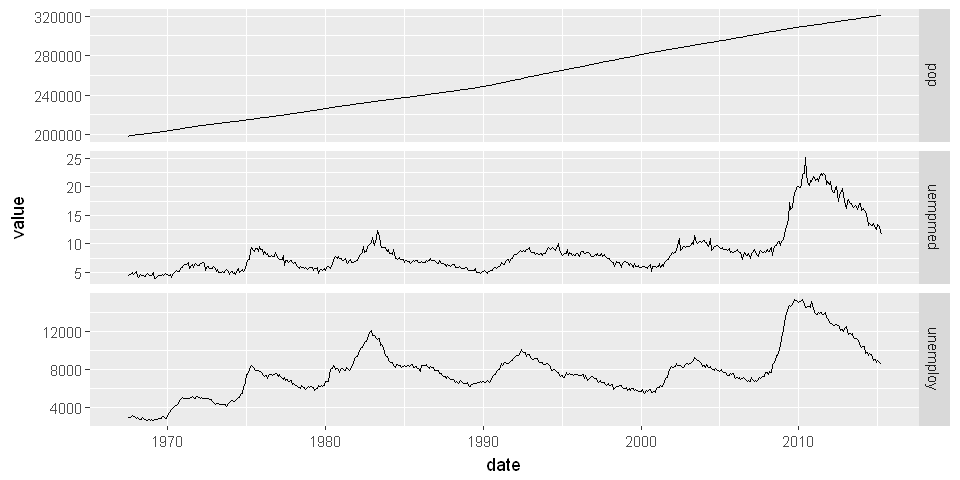

In [7]:
ggplot(data=economics.long[variable %in% c("pop","uempmed","unemploy")], aes(x=date, y=value)) + geom_line() + facet_grid(variable ~ ., scales = "free_y")

Ainda em cada série temporal podemos aplicar a mesma ideia de extrair tendências

`geom_smooth()` using method = 'loess'


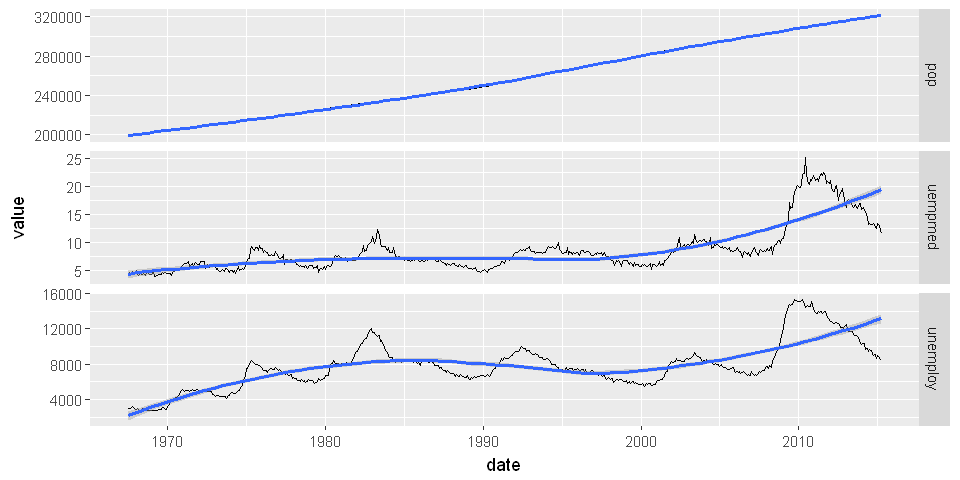

In [8]:
ggplot(data=economics.long[variable %in% c("pop","uempmed","unemploy")], aes(x=date, y=value)) + geom_line() + geom_smooth() + facet_grid(variable ~ ., scales = "free_y")

### Visualizacão de Várias instâncias (exemplos) de uma Variável Contínua ao Longo do Tempo

- Quando temos várias instâncias de uma variável continua, como no caso de vários exames de eletrocardiograma de pacientes (considerando apenas uma série temporal de cada um) também temos que colocar os dados em formato adequado para visualização.

- Por exemplo baixar o seguinte conjunto de dados: [ECG200](http://timeseriesclassification.com/description.php?Dataset=ECG200)

- ECG200 é um conjunto de dados bem conhecido sobre dados de eletrocardiograma com duas classes: 1 (normal) e -1 (anormal)

- Colocar os dados na pasta */data/ECG200/*

Um conjunto de dados temporais multivariados com múltiplas instâncias é definido como um conjunto:

$$X = \{ \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n \}$$


$$ \mathbf{x} =  
 \begin{matrix}
  \langle(t_1, & x_{1,1}, & x_{1,2}, & \ldots, & x_{1,d}), \\
  (t_2, & x_{2,1}, & x_{2,2}, & \ldots, & x_{2,d}), \\
  \ldots \\
  (t_m, & x_{m,1}, & x_{m,2}, & \ldots, & x_{m,d})\rangle
  \end{matrix}
$$

Em conjunto de dados supervisionados ainda temos o valor da classe ($y$). Neste caso, definimos o conjunto de dados da seguinte forma:


$$X = \{ (\mathbf{x}_1,y_1), (\mathbf{x}_2,y_2), \ldots, (\mathbf{x}_n,y_n) \}$$

In [9]:
ecg200 <- fread("data/ECG200/ECG200_TRAIN.txt")

- Este conjunto de dados está no formato Wide

In [10]:
head(ecg200)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97
-1,0.50206,0.54216,0.72238,1.42890,2.136500,2.28110,1.936300,1.46890,1.00880,...,0.931040,0.61030,0.63889,0.684680,0.583240,0.64052,0.708590,0.705010,0.71382,0.43376
1,0.14765,0.80467,0.36777,0.24389,0.026614,-0.27440,0.096731,-0.74773,-1.60980,...,-0.533500,-0.40023,0.17608,1.111800,2.438400,2.73490,1.736100,0.036857,-1.26510,-0.20802
-1,0.31665,0.24320,0.37047,1.06370,1.678200,1.75960,1.697700,1.61220,1.16820,...,0.764230,0.61062,0.55290,0.566790,0.604000,0.77707,0.812350,0.748850,0.81804,0.53935
-1,1.16890,2.07590,1.76010,1.60640,1.949000,1.30280,0.459330,0.51641,0.85218,...,0.419010,0.72389,1.32390,2.136500,1.746600,1.47020,1.893500,1.256900,0.80041,0.73154
1,0.64866,0.75203,2.63620,3.45570,2.118200,0.52062,-0.188630,0.78082,0.93377,...,-0.097869,-0.13679,-0.34024,-0.089441,-0.080297,-0.19258,-0.304700,-0.454560,0.31459,0.58219
1,0.40473,1.28090,2.51510,1.29950,1.453400,0.47428,-1.396600,-0.64708,0.43195,...,0.376470,0.27781,0.22568,0.159090,0.408350,0.54002,-0.027791,0.203480,0.34696,0.33918


- Vamos ter que identificar as colunas com nomes, definir a coluna que representa a classe e também adicionar uma coluna que indique a que paciente corresponde

In [11]:
colnames(ecg200) <- c("class",1:96)
ecg200$instance <- 1:nrow(ecg200)
head(ecg200)

class,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,instance
-1,0.50206,0.54216,0.72238,1.42890,2.136500,2.28110,1.936300,1.46890,1.00880,...,0.61030,0.63889,0.684680,0.583240,0.64052,0.708590,0.705010,0.71382,0.43376,1
1,0.14765,0.80467,0.36777,0.24389,0.026614,-0.27440,0.096731,-0.74773,-1.60980,...,-0.40023,0.17608,1.111800,2.438400,2.73490,1.736100,0.036857,-1.26510,-0.20802,2
-1,0.31665,0.24320,0.37047,1.06370,1.678200,1.75960,1.697700,1.61220,1.16820,...,0.61062,0.55290,0.566790,0.604000,0.77707,0.812350,0.748850,0.81804,0.53935,3
-1,1.16890,2.07590,1.76010,1.60640,1.949000,1.30280,0.459330,0.51641,0.85218,...,0.72389,1.32390,2.136500,1.746600,1.47020,1.893500,1.256900,0.80041,0.73154,4
1,0.64866,0.75203,2.63620,3.45570,2.118200,0.52062,-0.188630,0.78082,0.93377,...,-0.13679,-0.34024,-0.089441,-0.080297,-0.19258,-0.304700,-0.454560,0.31459,0.58219,5
1,0.40473,1.28090,2.51510,1.29950,1.453400,0.47428,-1.396600,-0.64708,0.43195,...,0.27781,0.22568,0.159090,0.408350,0.54002,-0.027791,0.203480,0.34696,0.33918,6


- Finalmente podemos transformar o conjunto de dados para o formato Long

In [12]:
ecg200.melt <- melt(ecg200, id.vars=c("instance","class"), variable.name = "time")
head(ecg200.melt)

instance,class,time,value
1,-1,1,0.50206
2,1,1,0.14765
3,-1,1,0.31665
4,-1,1,1.16890
5,1,1,0.64866
6,1,1,0.40473


- Uma vez feito isso podemos visualizar os dados. Em um primeiro exemplo vamos visualizar as 5 primeiras instâncias de ECG. Para isso precisamos no gráfico:
- Agrupar os valores de instância (de forma que cada instancia represente uma linha no gráfico)
- Usar a classe para definir a cor (a qual é numérica, mas as transformamos usando *fator* em discreta)

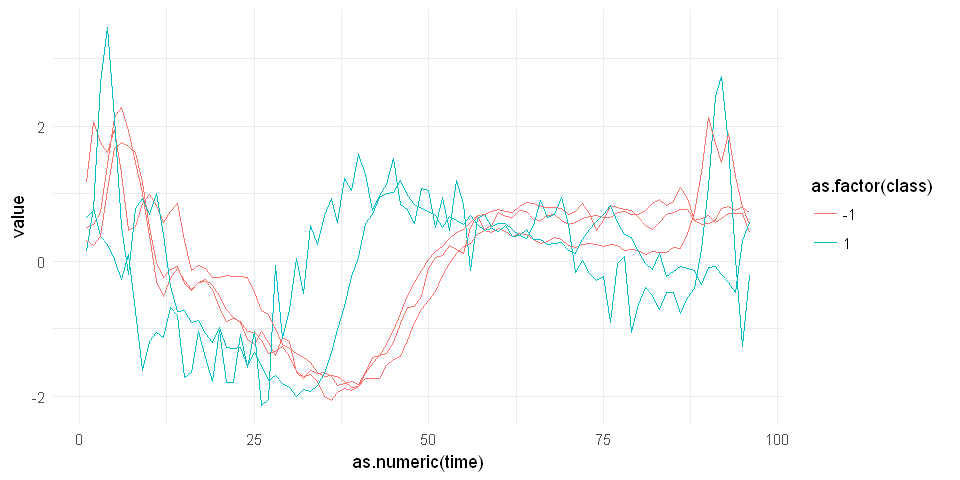

In [13]:
ggplot(ecg200.melt[instance %in% 1:5], aes(x = as.numeric(time), y = value, group = instance, color = as.factor(class) ) ) + geom_line() + theme_minimal()

- Neste segundo exemplo, visualizamos todas as instâncias

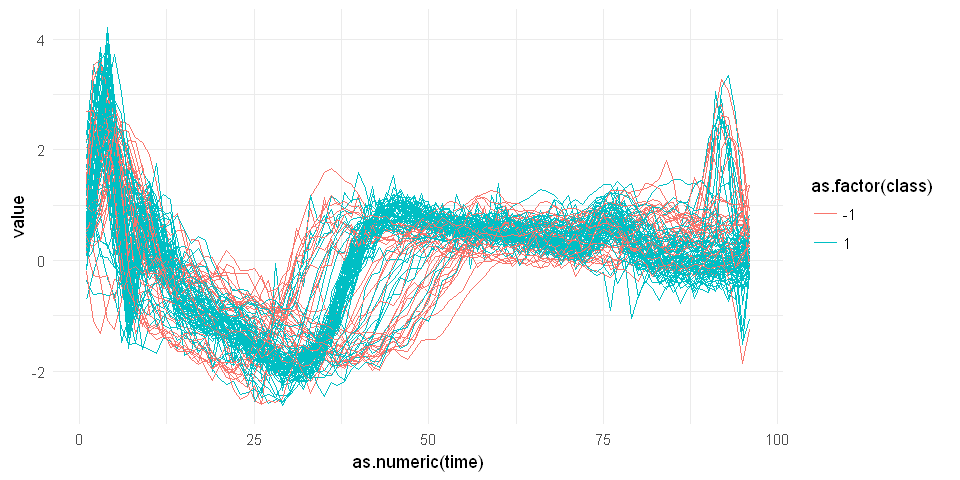

In [14]:
ggplot(ecg200.melt, aes(x = as.numeric(time), y = value, group = instance, color = as.factor(class) ) ) + geom_line() + theme_minimal()

## Dados de Textos

- Existem muitos conjunto de dados com texto, que podem ser extraídos por exemplo do Wikipedia ou do Twitter para estudo. Em R tem bibliotecas disponíves para extrair dados desse nesse formato. Em geral, irão precisar criar uma chave de acesso para poder usar esse serviço.

- Vamos estudar um conjunto de dados de análise de sentimento em reviews de filmes. Um dataset foi disponibilizado pela plataforma Kaggle no endereço https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

- Baixar os arquivos em uma pasta dentro do projeto e carregar o arquivo *train.csv*

- O arquivo contém frases entraídas de uma sentença geral por um extrator de frases a partir de sentenças.

- Essas frases foram rotuladas com o Sentimento;
    - 0 negative
    - 1 somewhat negative
    - 2 neutral
    - 3 somewhat positive
    - 4 positive

In [15]:
text <- fread("data/Text/train.tsv")
head(text)

PhraseId,SentenceId,Phrase,Sentiment
1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
2,1,A series of escapades demonstrating the adage that what is good for the goose,2
3,1,A series,2
4,1,A,2
5,1,series,2
6,1,of escapades demonstrating the adage that what is good for the goose,2


### Gráficos de Frequência de Palavras

- Uma atividade comum em visualização de dados textais é extrair a frequência de ocorrência das palavras nos textos. Para isso usamos a função *strsplit* para criar uma nova coluna com a palavra e depois criar uma coluna de frequência

[1] "A"             "series"        "of"            "escapades"    
[5] "demonstrating" "the"

In [27]:
dt1 <- text[,.(word=unlist(strsplit(Phrase," ")) )]
dt2 <- dt1[, .(count = .N),by=.(word)][order(-count)]
head(dt2)

word,count
the,46552
",",42006
a,33443
of,32245
and,31695
to,22363


Ao visualizar a frequência de palavras em textos é muito comum 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


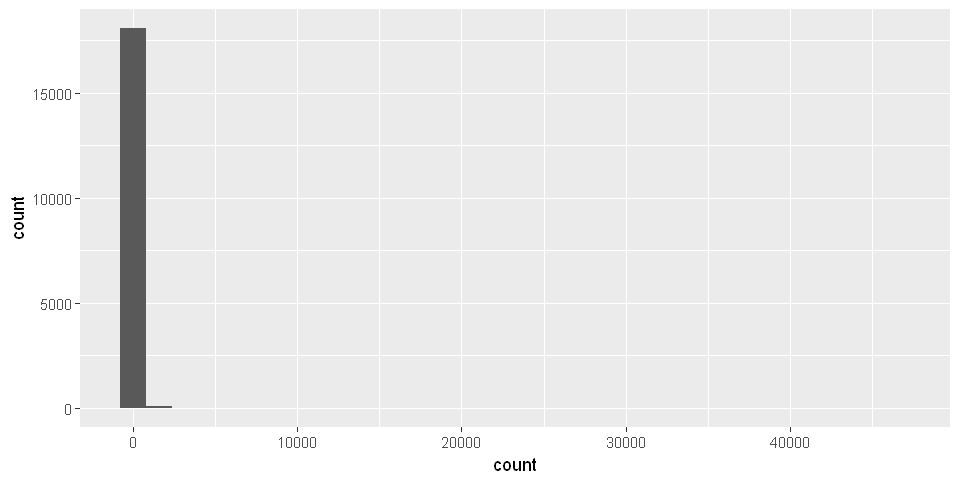

In [26]:
ggplot(dt2, aes(x=count)) + geom_histogram() 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


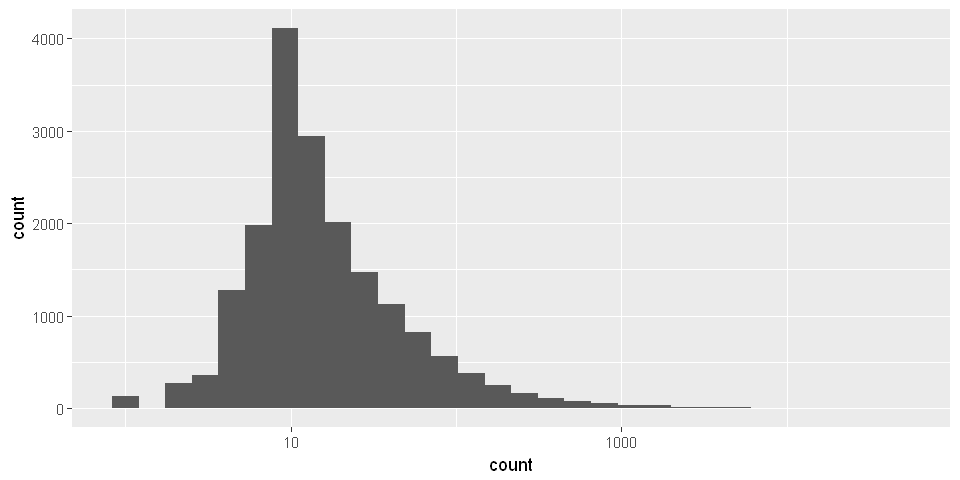

In [27]:
ggplot(dt2, aes(x=count)) + geom_histogram() + scale_x_log10()

- Visualização de frequências individuais das palavras, limitada a um número específico de palavras mais frequêntes

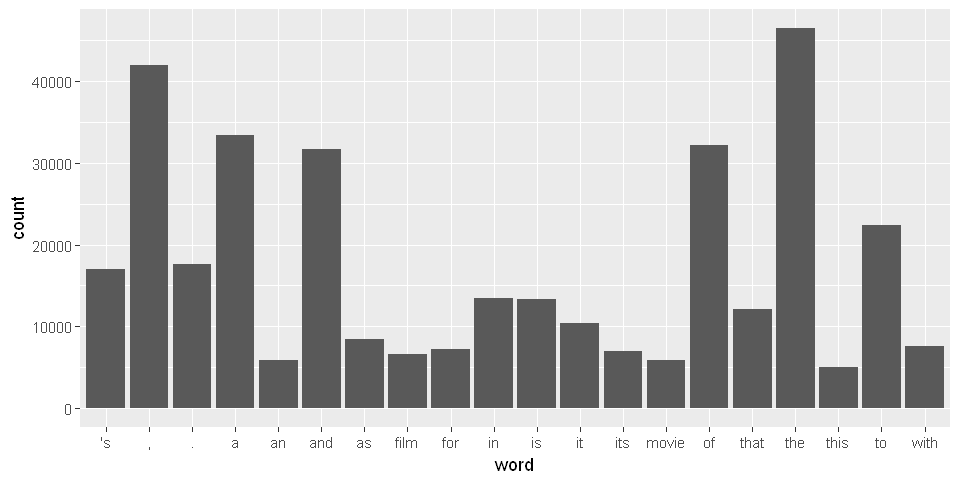

In [42]:
ggplot(dt2[1:20], aes(y=count, x=word )) + geom_bar(stat = "identity")

- Também podemos ordenar as barras pelo valor da frequência

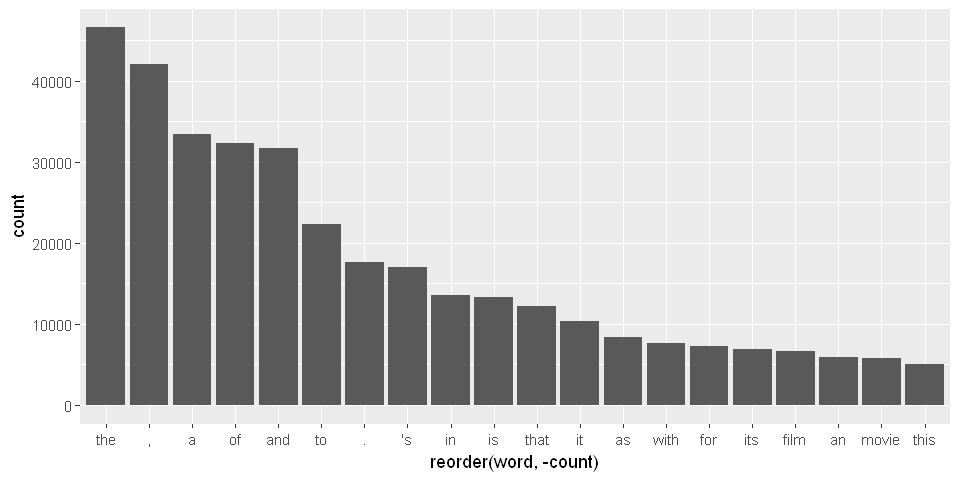

In [45]:
ggplot(dt2[1:20], aes(y=count, x=reorder(word,-count) )) + geom_bar(stat = "identity")

### Gráfico de Frequência de Palavras por Classe

- Para visualizar os dados por classe precisamos conservar o valor da classe para cada palavra, na hora de transformar o conjunto de dados

In [47]:
dt1 <- text[,.(word=unlist(strsplit(Phrase," ")) ), by=.(Sentiment)]
dt2 <- dt1[, .(count = .N),by=.(word,Sentiment)]
head(dt2)

word,Sentiment,count
A,1,449
series,1,84
of,1,6552
escapades,1,1
demonstrating,1,4
the,1,9712


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


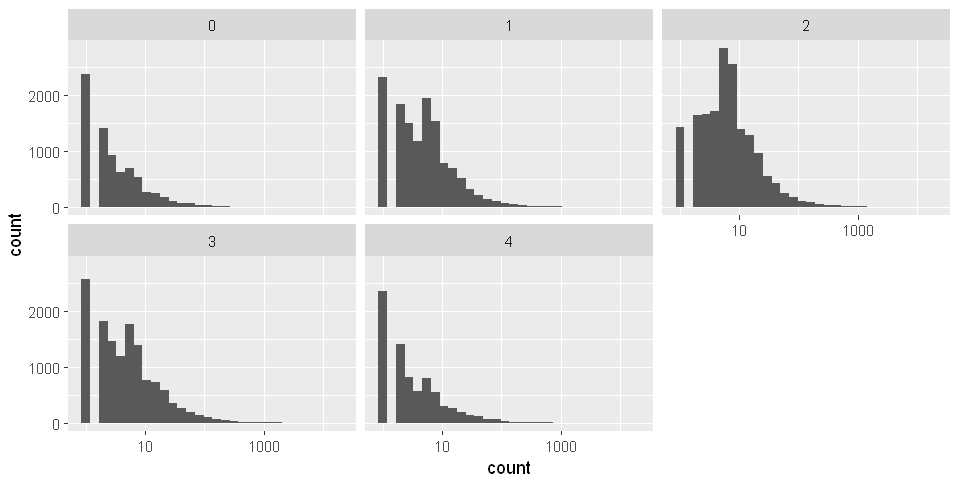

In [50]:
ggplot(dt2, aes(x=count)) + geom_histogram() + scale_x_log10() + facet_wrap(~Sentiment ) 

### Gráfico de Nuvem de Palavras (wordcloud)

- Atualmente é comum encontrar na Internet as chamadas wordclouds, que são formas de representar a frequência de palavras, onde quanto maior a frequência de uma palavra num conjunto de dados, maior é o seu tamanho no gráfico.

- No exemplo das revisões de filmes, vamos ver quais são as palavras mais frequêntes em textos onde o sentimento é 4 (positive) e onde o setimento é 0 (negative)

- Visualização das 30 palavras mais frequentes em revisões positivas (Sentiment 4)

In [197]:
options(repr.plot.width=10, repr.plot.height=7)

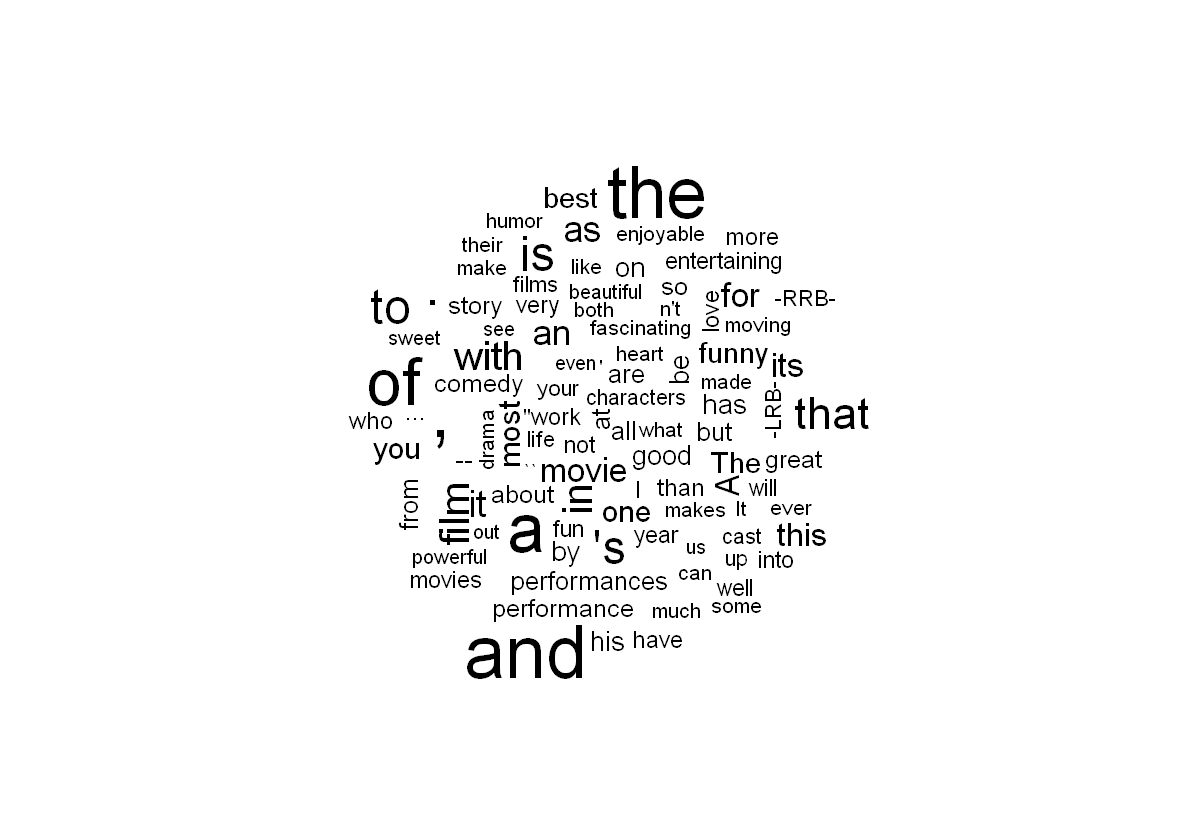

In [225]:
dt3 <- dt2[Sentiment == "4"][order(-count)][1:100]
wordcloud(dt3$word, sqrt(dt3$count))

- Visualização das 30 palavras mais frequentes em revisões negativas (Sentiment 0)

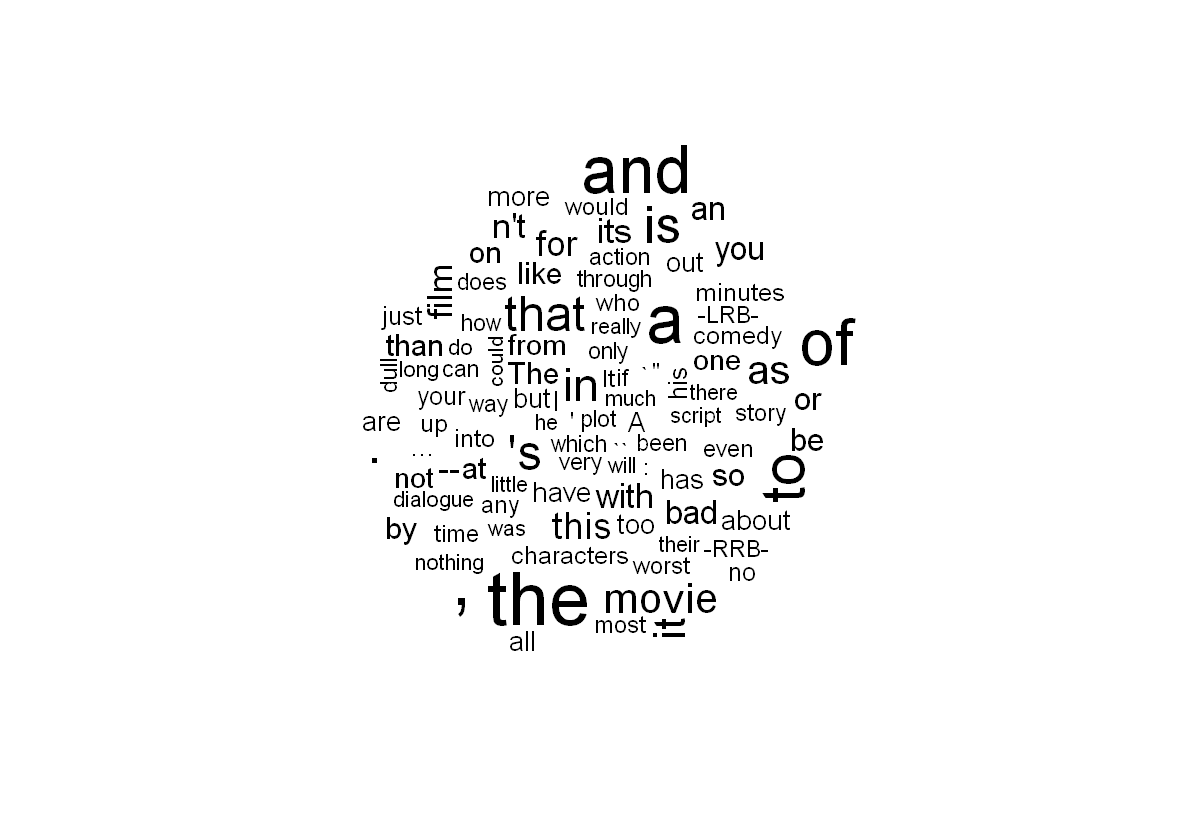

In [232]:
dt3 <- dt2[Sentiment == "0"][order(-count)][1:100]
wordcloud(dt3$word, sqrt(dt3$count))

# Atividades

- Conjunto de dados ECG
    - Gerar um gráfico separando as instâncias por classe em dois subplots, um ao lado do outro. Manter as cores vermelha e verde para as classes
    - Gerar um gráfico de boxplot dos valores das séries por classe. A idéia é que se calcule um boxplot para cada classe no mesmo gráfico
    - Gerar um gráfico de densidade dos valores das séries por classe. Utilizar valor de alpha para visualizar a superposição das curvas
    - Gerar um gráfico de pontos para representar cada série por um ponto colorido, onde eixo X represente a Média dos Valores da série, o eixo Y o Desvio Padrão dos valores da Série e a Cor a classe
    

- Conjunto de dadso de Revisões de Filme
    - Gerar um gráfico de densidade da contagem de palavras, para as palavras que estão com contagem entre 1 e 100, por classe. Mantenha cores diferentes para cada curva de densidade e utilize a transparência para diferenciar as curvas
    - Gerar um gráfico de wordcloud para cada sentimento das 100 palavras mais frequêntes
    - Gerar um gráfcio de wordcloud para cada sentimento com 30 palavras, entre vigésima e quinquagésima mais frequêntes